<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n20.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.432938,32.011216,-0.000869,106.443285,106.443993,-0.000708
1,0.0,1.0,38.180120,73.563602,-0.000072,121.743649,121.743778,-0.000129
2,0.0,2.0,26.794069,35.536216,0.000709,72.330994,72.330220,0.000775
3,0.0,3.0,79.831426,61.789961,0.000131,151.621519,151.621308,0.000211
4,0.0,4.0,34.393191,67.801738,-0.000104,112.194826,112.194972,-0.000146
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.114397,58.528066,-0.000139,128.642325,128.642438,-0.000114
119996,999.0,116.0,61.185607,54.567516,-0.000193,125.752930,125.753080,-0.000151
119997,999.0,117.0,34.217027,38.190661,0.000792,82.408481,82.407728,0.000752
119998,999.0,118.0,35.818938,26.872195,0.002514,72.693647,72.691129,0.002518


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.432938,32.011216,-0.000869,106.443285,106.443993,-0.000708
1,0.0,1.0,38.180120,73.563602,-0.000072,121.743649,121.743778,-0.000129
2,0.0,2.0,26.794069,35.536216,0.000709,72.330994,72.330220,0.000775
3,0.0,3.0,79.831426,61.789961,0.000131,151.621519,151.621308,0.000211
4,0.0,4.0,34.393191,67.801738,-0.000104,112.194826,112.194972,-0.000146
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.114397,58.528066,-0.000139,128.642325,128.642438,-0.000114
119996,999.0,116.0,61.185607,54.567516,-0.000193,125.752930,125.753080,-0.000151
119997,999.0,117.0,34.217027,38.190661,0.000792,82.408481,82.407728,0.000752
119998,999.0,118.0,35.818938,26.872195,0.002514,72.693647,72.691129,0.002518


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.432938  32.011216 -0.000869  106.443285  106.443993 -0.000708
      1.0    38.180120  73.563602 -0.000072  121.743649  121.743778 -0.000129
      2.0    26.794069  35.536216  0.000709   72.330994   72.330220  0.000775
      3.0    79.831426  61.789961  0.000131  151.621519  151.621308  0.000211
      4.0    34.393191  67.801738 -0.000104  112.194826  112.194972 -0.000146
...                ...        ...       ...         ...         ...       ...
999.0 115.0  60.114397  58.528066 -0.000139  128.642325  128.642438 -0.000114
      116.0  61.185607  54.567516 -0.000193  125.752930  125.753080 -0.000151
      117.0  34.217027  38.190661  0.000792   82.408481   82.407728  0.000752
      118.0  35.818938  26.872195  0.002514   72.693647   72.691129  0.002518
      119.0  30.006886  52.642858  0.000529   92.650274   92.649851  0.000423

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.432938  32.011216 -0.000869  106.443285  106.443993 -0.000708
      1.0    38.180120  73.563602 -0.000072  121.743649  121.743778 -0.000129
      2.0    26.794069  35.536216  0.000709   72.330994   72.330220  0.000775
      3.0    79.831426  61.789961  0.000131  151.621519  151.621308  0.000211
      4.0    34.393191  67.801738 -0.000104  112.194826  112.194972 -0.000146
...                ...        ...       ...         ...         ...       ...
999.0 115.0  60.114397  58.528066 -0.000139  128.642325  128.642438 -0.000114
      116.0  61.185607  54.567516 -0.000193  125.752930  125.753080 -0.000151
      117.0  34.217027  38.190661  0.000792   82.408481   82.407728  0.000752
      118.0  35.818938  26.872195  0.002514   72.693647   72.691129  0.002518
      119.0  30.006886  52.642858  0.000529   92.650274   92.649851  0.000423

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.432938,32.011216,-0.000869,106.443285,106.443993,-0.000708
1,0.0,1.0,38.180120,73.563602,-0.000072,121.743649,121.743778,-0.000129
2,0.0,2.0,26.794069,35.536216,0.000709,72.330994,72.330220,0.000775
3,0.0,3.0,79.831426,61.789961,0.000131,151.621519,151.621308,0.000211
4,0.0,4.0,34.393191,67.801738,-0.000104,112.194826,112.194972,-0.000146
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.114397,58.528066,-0.000139,128.642325,128.642438,-0.000114
119996,999.0,116.0,61.185607,54.567516,-0.000193,125.752930,125.753080,-0.000151
119997,999.0,117.0,34.217027,38.190661,0.000792,82.408481,82.407728,0.000752
119998,999.0,118.0,35.818938,26.872195,0.002514,72.693647,72.691129,0.002518


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.432938  32.011216 -0.000869  106.443285  106.443993 -0.000708
      1.0    38.180120  73.563602 -0.000072  121.743649  121.743778 -0.000129
      2.0    26.794069  35.536216  0.000709   72.330994   72.330220  0.000775
      3.0    79.831426  61.789961  0.000131  151.621519  151.621308  0.000211
      4.0    34.393191  67.801738 -0.000104  112.194826  112.194972 -0.000146
...                ...        ...       ...         ...         ...       ...
999.0 115.0  60.114397  58.528066 -0.000139  128.642325  128.642438 -0.000114
      116.0  61.185607  54.567516 -0.000193  125.752930  125.753080 -0.000151
      117.0  34.217027  38.190661  0.000792   82.408481   82.407728  0.000752
      118.0  35.818938  26.872195  0.002514   72.693647   72.691129  0.002518
      119.0  30.006886  52.642858  0.000529   92.650274   92.649851  0.000423

[120000 rows x 6 columns]

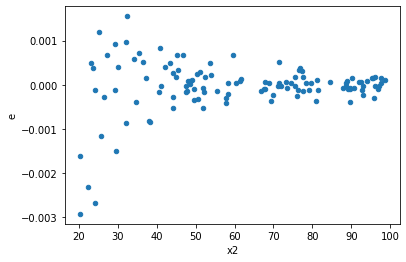

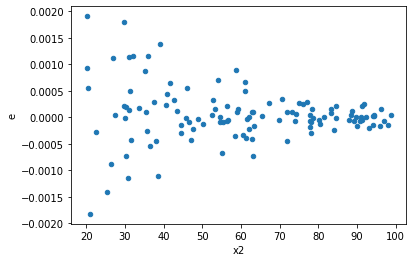

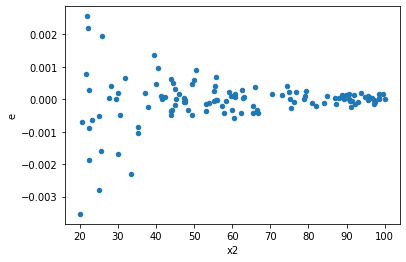

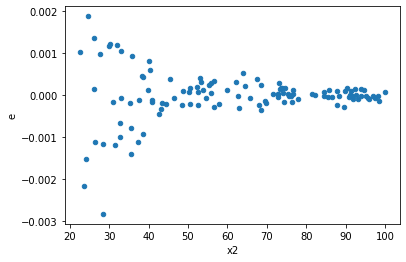

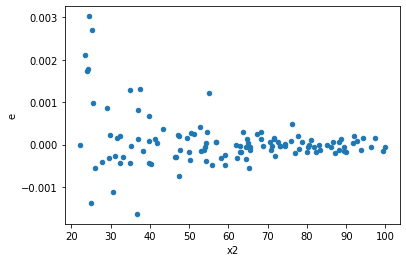

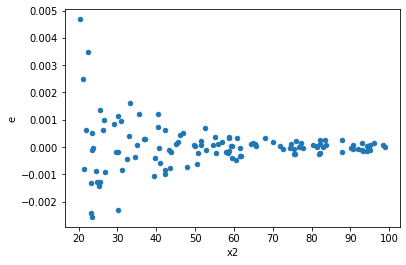

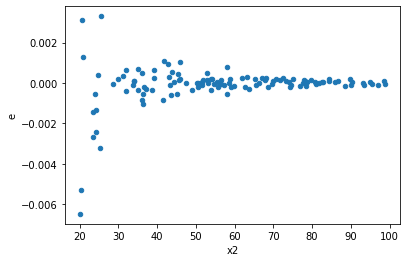

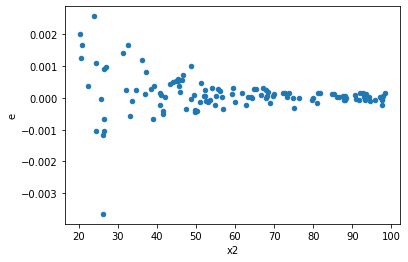

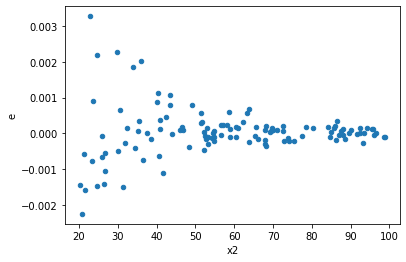

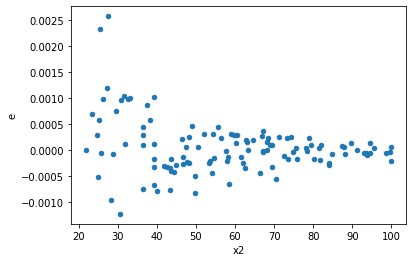

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,3.195561416290363e-05,1.6126939202394206e-06,6.946872644109484e-07,3.5058563483465667e-08,0.05046668519710542,1.3898696626433362e-18,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,2.0530536068087925e-05,6.630127295177006e-06,4.4631600148017227e-07,1.4413320206906535e-07,0.32293980406496475,0.00020082223701741405,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,4.699778941302606e-05,2.2530202518998405e-06,1.0216910741962187e-06,4.8978701128257403e-08,0.04793885584915162,4.73936790947747e-19,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,3.149052310403749e-05,1.4168550769911006e-06,6.845765892182062e-07,3.080119732589349e-08,0.044993062589342686,1.2475286141721122e-19,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,3.4783135656776145e-05,3.254197392111592e-06,7.561551229733945e-07,7.07434215676433e-08,0.09355675762595135,3.475981966289649e-13,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,5.682917156806857e-05,5.730589286597117e-06,1.235416773218882e-06,1.2457802796950254e-07,0.10083886723094598,1.4561636554202967e-12,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.00010131275753474005,5.826204261513855e-06,2.2024512507552185e-06,1.2665661438073599e-07,0.05750711364771663,2.0885115560304602e-17,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,3.694082985598655e-05,1.2559769594061357e-06,8.030615186084033e-07,2.7303846943611645e-08,0.03399969530469535,3.1608321352117523e-22,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,3.2009444929458875e-05,5.269000375111944e-06,6.958574984664973e-07,1.1454348641547704e-07,0.1646076771004169,9.678086965301898e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    997
Reject001=1 : Homoscedasticity        3
Name: Result_test, dtype: int64